# Debye Length

In [12]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# Define Constants
epsilon_inf = 4.25
f = np.logspace(-4,3,10000) # Frequency [GHz]
T = 10 # Actual temperature [Celsius]
T_ref = 25 # Reference temperature [Celsius]
sigma_25 = 0.075 # Electrical conductivity in [S/m] 
epsilon_free = 8.854187817620 * 10**(-12) # [Farads/m] Not used. 
# All dielectric constants are relative to that of free space


In [54]:
# Define empirical expressions (Set of equations A7)
# Temperature (T) in Celsius
# Relaxation frequency (f_rel) in Hz
# Static electrical conductivity (sigma_dc) in S/m
epsilon_s = 87.74 - 0.4008*T + 9.398*10**(-4)*T**2 - 1.410*10**(-6)*T**3
f_rel = (1.1109*10**(-10) - 3.824*10**(-12)*T + 6.938*10**(-14)*T**2 - 5.096*10**(-16)*T**3)**(-1) # in Hz (Or and Wraith made a typo on the exponent of the last term)
f_rel = f_rel/10**9 # in GHz
delta_T = T_ref - T
sigma_dc = sigma_25*(1 - 0.02*delta_T) # Correct EC for temperature effects


In [55]:
# Calculation of real and imaginary dielectric constant of water
epsilon_real = epsilon_inf + (epsilon_s - epsilon_inf) / (1 + (f/f_rel)**2) # Eq. A4
epsilon_im = (epsilon_s - epsilon_inf) * (f/f_rel) / (1 + (f/f_rel)**2) + sigma_dc/(2*np.pi*f*1) # Eq. A5
tan_loss = epsilon_im / epsilon_real # Eq. A6


Figure showing the real and imaginary components of the complex dielectric constant. This figure is only intended to point out that at the working frequency of the CS655 soil water reflectometer, the tangent loss is low at low EC contents.


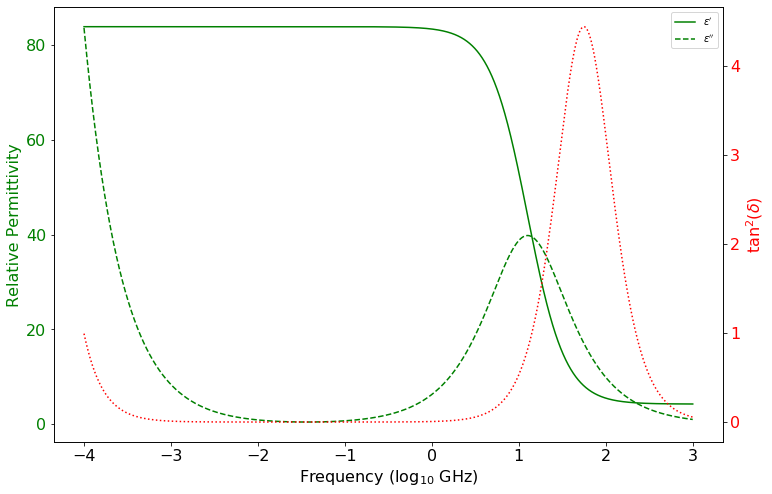

In [68]:
# Creating plot with secondary Y axis
plt.figure(figsize=(12,8), facecolor='w')

plt.subplot()
plt.plot(np.log10(f),epsilon_real,'-g', label="$\epsilon'$")
plt.plot(np.log10(f),epsilon_im,'--g', label="$\epsilon''$")
plt.xlabel("Frequency (log$_{10}$ GHz)", size=16)
plt.xticks(fontsize=16)
plt.ylabel("Relative Permittivity", color='g', size=16)
plt.yticks(color='g', fontsize=16)
plt.legend()

plt.twinx()
plt.plot(np.log10(f),tan_loss**2,':r', label="tan$^2 (\delta)$")
plt.yticks(color='r', fontsize=16)
plt.ylabel("tan$^2 (\delta)$", color='r', size=16)

plt.show()

Dielectric permittivity spectrum and loss tangent for water with electrical conductivioty of 0.075 S/m
at temperatures of 283 K. See Figure 12a in Or and Wraith 1999.

## References

Or, D. and Wraith, J.M., 1999. Temperature effects on soil bulk dielectric permittivity measured by time domain reflectometry: A physical model. Water Resources Research, 35(2), pp.371-383.